# **Multivariate Linear Regression**

## **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
test=pd.read_csv("/content/sample_data/california_housing_test.csv")
train=pd.read_csv("/content/sample_data/california_housing_train.csv")

In [3]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [4]:
test.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0
2999,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0


In [5]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   h

In [0]:
n_train = train.shape[0]
n_test = test.shape[0]
y = train['median_house_value'].values
data = pd.concat((train, test)).reset_index(drop = True)
data.drop(['longitude','latitude'], axis=1, inplace = True)

## **Data Analysis**

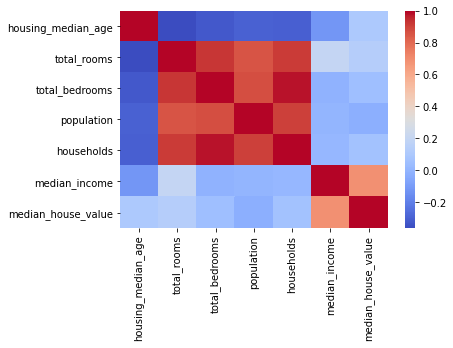

In [7]:
plt.figure()
sns.heatmap(data.corr(), cmap='coolwarm')
plt.show()

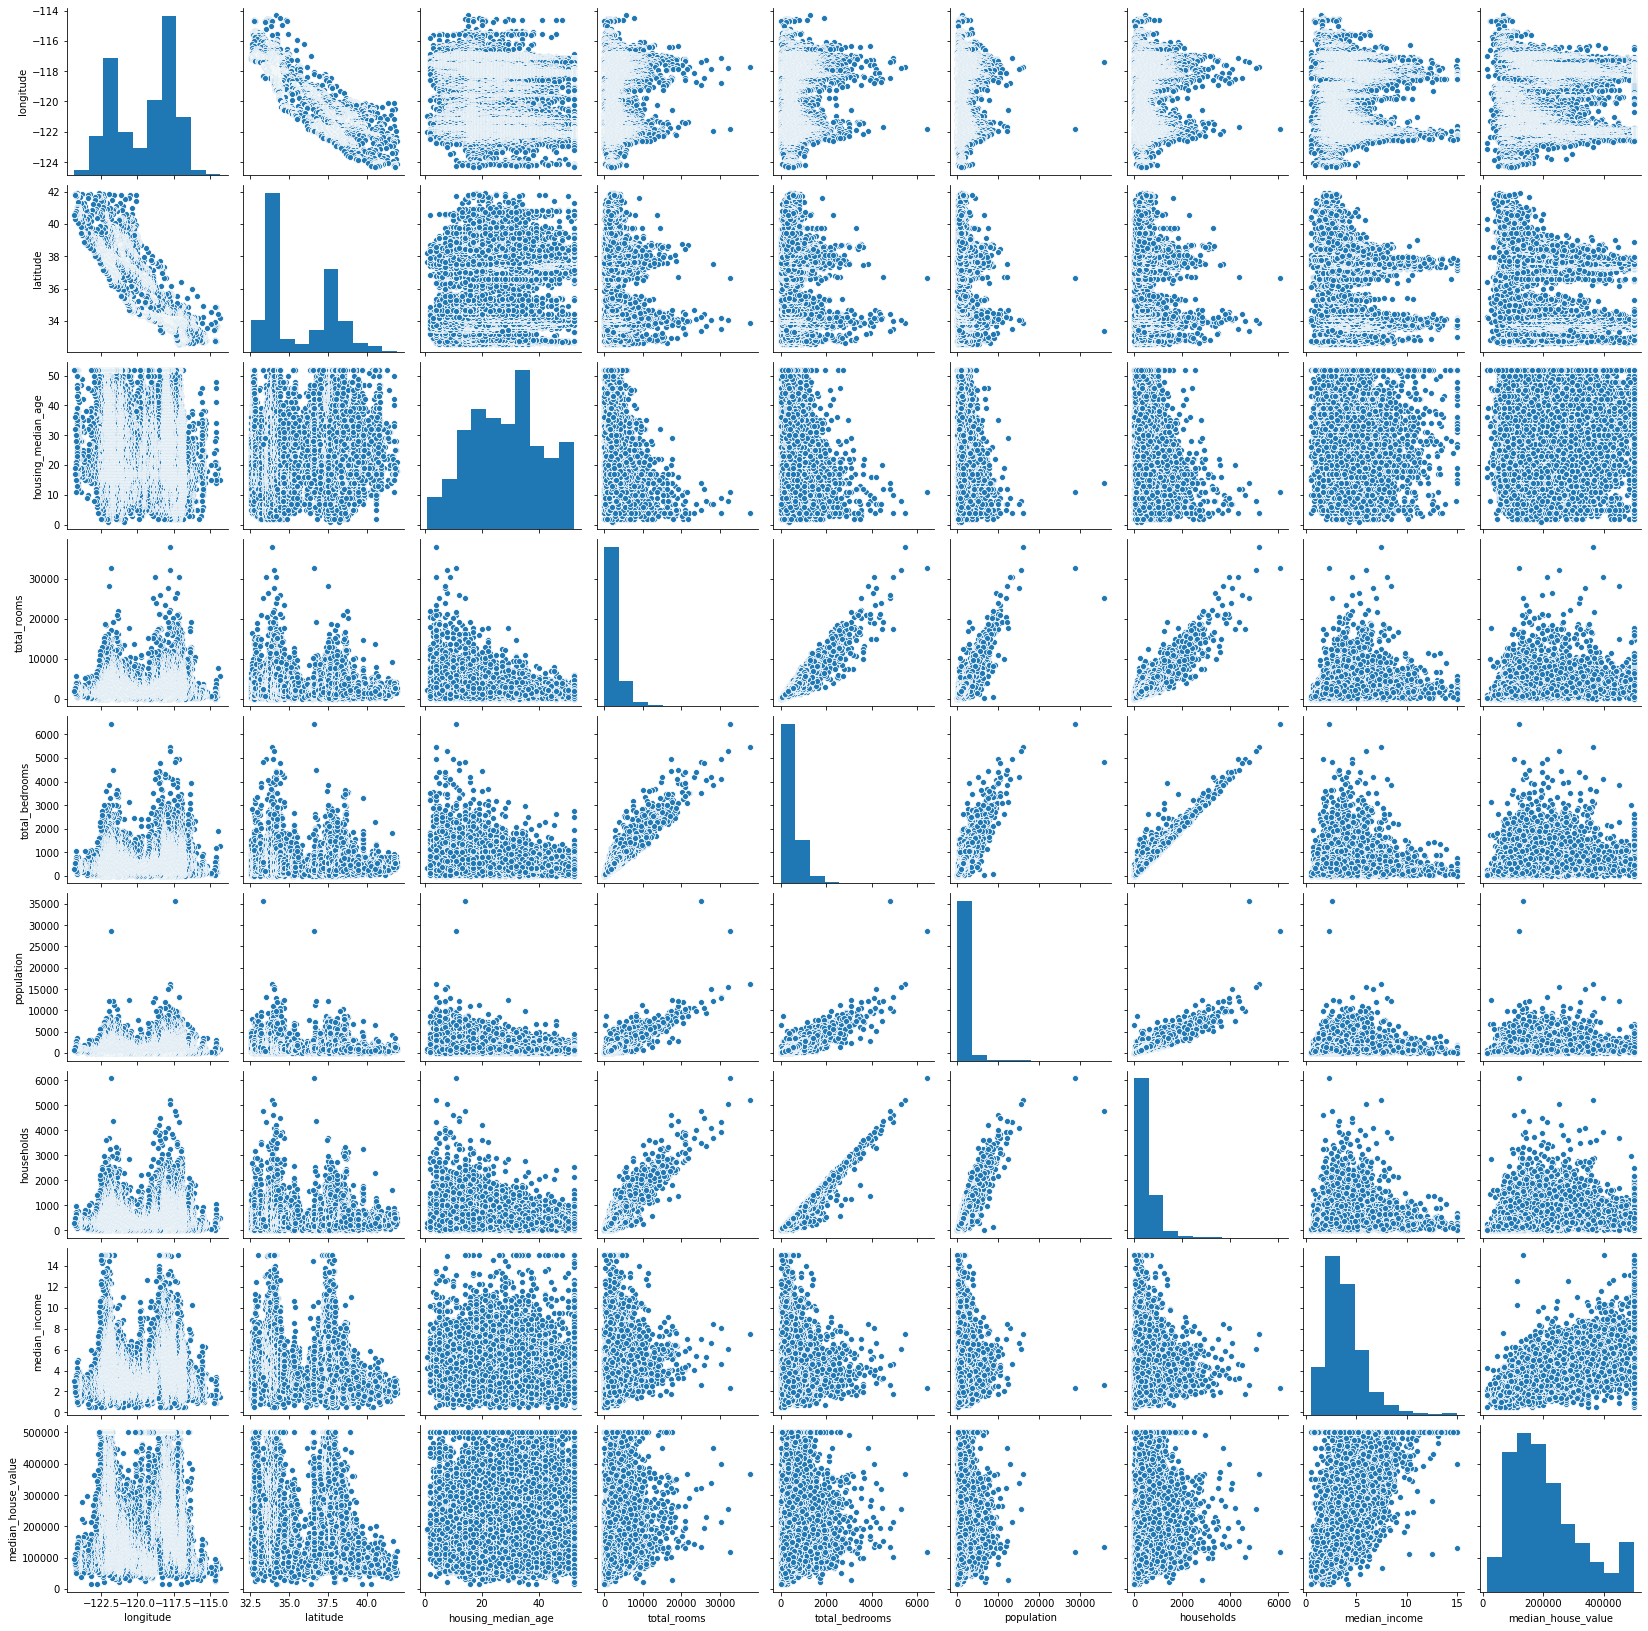

In [8]:
sns.pairplot(train, palette='rainbow')

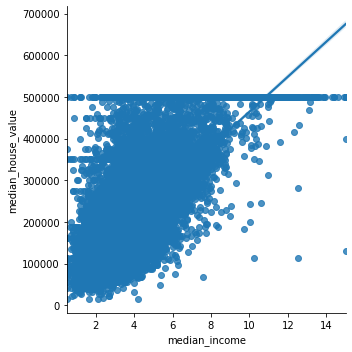

In [9]:
sns.lmplot(x='median_income', y='median_house_value', data=train)

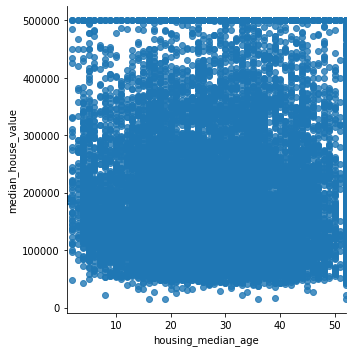

In [10]:
sns.lmplot(x='housing_median_age', y='median_house_value', data=train)

## **Feature Engineering**

In [11]:
data = data[['total_rooms', 'total_bedrooms', 'housing_median_age', 'median_income', 'population', 'households']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_rooms         20000 non-null  float64
 1   total_bedrooms      20000 non-null  float64
 2   housing_median_age  20000 non-null  float64
 3   median_income       20000 non-null  float64
 4   population          20000 non-null  float64
 5   households          20000 non-null  float64
dtypes: float64(6)
memory usage: 937.6 KB


In [0]:
data['total_rooms'] = data['total_rooms'].fillna(data['total_rooms'].mean())
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].mean())
data['housing_median_age'] = data['housing_median_age'].fillna(data['housing_median_age'].mean())
data['median_income'] = data['median_income'].fillna(data['median_income'].mean())
data['population'] = data['population'].fillna(data['population'].mean())
data['households'] = data['households'].fillna(data['households'].mean())

In [13]:
data.shape

(20000, 6)

In [0]:
train = data[:n_train]
test = data[n_train:]

## **Fitting The Model**

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.2, random_state = 0)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
print(regressor.intercept_)

[-1.40845699e-16]


In [19]:
print(regressor.coef_)

[[-0.39448989  0.39260529  0.20329507  0.79658757 -0.34185744  0.40188607]]


In [0]:
predictions = regressor.predict(X_test)
predictions = predictions.reshape(-1,1)

In [21]:
from sklearn.metrics import mean_squared_error
print('MSE:', mean_squared_error(y_test,predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test,predictions)))

MSE: 0.43942766613330025
RMSE: 0.6628934048044981


Text(0.5, 1.0, 'Multivariate Regression Model')

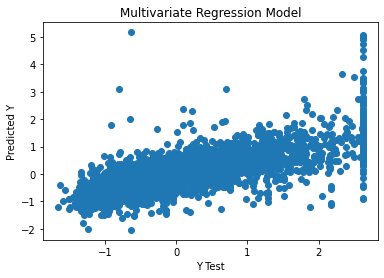

In [22]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Multivariate Regression Model')